### Lab Solution: CSV

In [3]:
import pandas as pd

df = pd.read_csv("data/housing.csv", comment="#")

In [10]:
import matplotlib.pyplot as plt

### Lab Activity

1. What is the most expensive NY property (in price per square foot)? In SF?
2. What are the top 10 highest elevation properties in SF? In NY?
3. If you *didn't know* whether a property was in SF or NY, what info in the dataset (besides the `in_sf` flag, obviously) might be useful to figure out the property's location?
4. How well would that work? Why?
5. Do properties seem to have a "price per bedroom"? How would you ask (or answer) that kind of question?
6. In SF, higher elevation properties might have a view, or they might be in nice neighborhoods like Nob Hill or Russian Hill. Does the elevation correlate with price?

In [16]:
df[df.in_sf==0].describe()['price_per_sqft']

count     224.000000
mean     1626.522321
std       845.845934
min       467.000000
25%       995.000000
50%      1416.000000
75%      1952.000000
max      4601.000000
Name: price_per_sqft, dtype: float64

In [17]:
df[df.in_sf==1].describe()['price_per_sqft']

count     268.000000
mean      835.485075
std       326.502857
min       270.000000
25%       610.000000
50%       768.500000
75%       979.500000
max      2240.000000
Name: price_per_sqft, dtype: float64

In [18]:
df[df.in_sf==0].sort_values(by='elevation', ascending=False).head(10)

,in_sf,beds,bath,price,year_built,sqft,price_per_sqft,elevation
186,0,2.0,1.0,365000,1925,700,521,73
187,0,2.0,1.0,365000,1925,700,521,73
184,0,2.0,1.0,559900,1925,1200,467,51
185,0,2.0,1.0,545000,1939,1049,520,39
154,0,2.0,2.0,1350000,1931,1300,1038,36
180,0,1.0,1.0,499999,2011,669,747,35
181,0,1.0,1.0,749000,2011,762,983,35
218,0,2.0,2.0,1575000,1930,1324,1190,33
164,0,1.0,1.0,650000,1907,720,903,32
163,0,2.0,1.0,1250000,1922,1145,1092,30


In [19]:
df[df.in_sf==1].sort_values(by='elevation', ascending=False).head(10)

,in_sf,beds,bath,price,year_built,sqft,price_per_sqft,elevation
343,1,4.0,4.5,5200000,1952,4813,1080,238
363,1,3.0,2.0,989000,1940,1603,617,227
491,1,3.0,2.0,995000,1956,1305,762,216
427,1,3.0,2.0,995000,1956,1305,762,216
451,1,2.0,1.0,599000,1972,990,605,189
450,1,3.0,2.5,1095000,1968,1868,586,187
449,1,3.0,2.0,1080000,1989,1524,709,185
425,1,2.0,2.0,599000,1990,862,695,181
426,1,5.0,3.5,2995000,1947,3890,770,181
424,1,3.0,2.0,1049000,1947,1626,645,179


In [21]:
df[df.in_sf==0].describe()

,in_sf,beds,bath,price,year_built,sqft,price_per_sqft,elevation
count,224.0,224.000000,224.000000,2.240000e+02,224.000000,224.000000,224.000000,224.000000
mean,0.0,1.734375,1.819196,2.787579e+06,1965.142857,1398.044643,1626.522321,13.504464
std,0.0,1.302714,1.188373,3.827432e+06,41.538433,1066.051740,845.845934,9.423755
min,0.0,0.000000,1.000000,2.990000e+05,1880.000000,310.000000,467.000000,0.000000
25%,0.0,1.000000,1.000000,7.790000e+05,1925.000000,715.000000,995.000000,10.000000
50%,0.0,2.000000,2.000000,1.562500e+06,1969.000000,1050.000000,1416.000000,10.000000
75%,0.0,2.000000,2.000000,2.999000e+06,2006.000000,1614.500000,1952.000000,16.000000
max,0.0,10.000000,10.000000,2.750000e+07,2016.000000,7500.000000,4601.000000,73.000000


In [22]:
df[df.in_sf==1].describe()

,in_sf,beds,bath,price,year_built,sqft,price_per_sqft,elevation
count,268.0,268.000000,268.000000,2.680000e+02,268.000000,268.000000,268.000000,268.000000
mean,1.0,2.507463,1.977985,1.379719e+06,1954.055970,1627.421642,835.485075,61.861940
std,0.0,1.200788,0.952427,1.235009e+06,39.127189,958.614147,326.502857,50.271022
min,1.0,0.000000,1.000000,1.875180e+05,1890.000000,507.000000,270.000000,0.000000
25%,1.0,2.000000,1.000000,7.386750e+05,1922.000000,1030.000000,610.000000,19.000000
50%,1.0,2.000000,2.000000,9.890000e+05,1948.000000,1450.000000,768.500000,55.000000
75%,1.0,3.000000,2.500000,1.596250e+06,1995.250000,1907.500000,979.500000,89.000000
max,1.0,6.000000,6.500000,9.895000e+06,2015.000000,7800.000000,2240.000000,238.000000


In [23]:
df[df.in_sf==1].eval('price / beds').describe()

count    2.680000e+02
mean              inf
std               NaN
min      1.193333e+05
25%      3.495000e+05
50%      4.700417e+05
75%      7.361667e+05
max               inf
dtype: float64

In [29]:
sf = df[df.in_sf == 1]
sf[sf.beds==0]

,in_sf,beds,bath,price,year_built,sqft,price_per_sqft,elevation
368,1,0.0,1.0,499000,1900,510,978,91
369,1,0.0,1.0,499000,1900,510,978,91
482,1,0.0,1.0,539000,2000,709,760,5


In [30]:
sf.eval('price / (beds+1)').describe()

count    2.680000e+02
mean     3.883011e+05
std      2.539173e+05
min      8.950000e+04
25%      2.483750e+05
50%      3.245000e+05
75%      4.470625e+05
max      1.983333e+06
dtype: float64

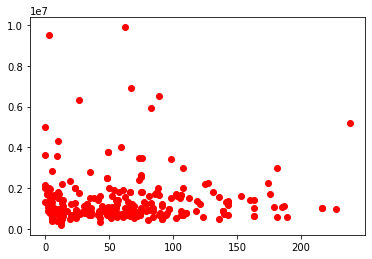

In [31]:
plt.plot(sf.elevation, sf.price, 'o', c='red')